# On the acceptance kernel normalization constant

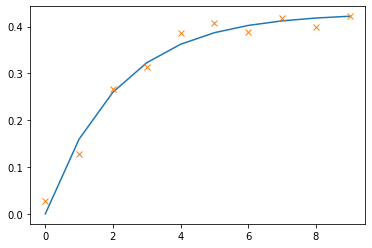

In [53]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

import pyabc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import copy
import logging
import pickle
from study_abc_noise.model.conversion_reaction import *
%matplotlib inline

df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

mv = ConversionReaction1dModelVars(n_t=10)

def load_data():
    try:
        _data = pickle.load(open("data_cr.dat", "rb"))[1]
    except:
        _data_nonoise = mv.get_model()(mv.p_true)
        _data = mv.get_model_noisy()(mv.p_true)
        pickle.dump((_data_nonoise, _data), open("data_cr.dat", "wb"))
    return _data

data = load_data()
prior = mv.get_prior()
model = mv.get_model()
pop_size = 2000
sampler = pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20)

xmin = mv.limits['p0'][0]
xmax = mv.limits['p0'][1]

data_nonoise = model(mv.p_true)
plt.plot(data_nonoise['y'], '-')
plt.plot(data['y'], 'x')

## Analysis

In [2]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=False)
temperature = pyabc.Temperature()
kernel = mv.get_kernel()
#kernel.pdf_max=25.5
kernel.pdf_max=20

print(kernel(data, data))
abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor,
                   eps=temperature, population_size=pop_size, sampler=sampler)
h_incorrect = abc.new("sqlite:///h_incorrect_cr.db", data)
h_incorrect = abc.run(max_nr_populations=10)

29.93084472223473


INFO:History:Start <ABCSMC(id=1, start_time=2020-01-13 13:44:04.911343, end_time=None)>
DEBUG:Acceptor:pdf_norm=2.0000e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [25.718143284493067].
INFO:ABC:t: 0, eps: 25.718143284493067.
DEBUG:Acceptor:Encountered pd=2.5428e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4988e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4681e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1160e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5395e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2282e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1333e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3720e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1278e+01 > c=2.0000e+01, thus weight=1.0000

DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0796e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4910e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1683e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2035e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5440e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0017e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4978e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5268e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5186e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1260e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3017e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.3335e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0053e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1622e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1098e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5336e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5147e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0096e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5368e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5454e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4658e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5146e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.1305e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5394e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4872e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5253e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0224e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1124e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3962e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5074e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5451e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2098e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5235e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4236e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0800e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3439e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3929e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0436e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4806e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1752e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4545e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4631e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5494e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2627e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2813e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4560e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5154e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1556e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4513e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3529e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3431e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4239e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5309e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4910e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5464e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5073e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1942e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5483e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3322e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5436e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4691e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5183e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5456e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2084e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0977e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4759e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4690e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5048e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3453e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5482e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1063e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2533e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0590e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3674e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3855e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1072e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3647e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5391e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4099e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5355e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3736e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5199e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4908e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4820e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0586e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5358e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4049e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5477e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1189e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4104e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3915e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5359e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0934e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4589e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4612e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4104e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1136e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5470e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3612e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4406e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0261e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5425e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4058e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2575e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5469e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.0860e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2150e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4923e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3549e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1972e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4150e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0565e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0223e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5110e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2077e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4747e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2329e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5341e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2974e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4632e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3528e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5062e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4916e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3973e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4783e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0650e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4465e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3421e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5212e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4668e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5406e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3570e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1658e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2942e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3799e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1746e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1914e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5438e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2560e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2879e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4536e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5390e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5372e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0314e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5087e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5462e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5165e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5299e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3092e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3033e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5410e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1557e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0274e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5288e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5387e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5148e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4640e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1629e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2381e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5468e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3873e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3527e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5362e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4727e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4351e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4943e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4918e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5269e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3310e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5245e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4650e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1864e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5385e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2583e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4879e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3636e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3553e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2756e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4979e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3909e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1949e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4114e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3328e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0986e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3807e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2455e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2770e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4173e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2520e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5241e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2527e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3308e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2707e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5135e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5498e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4197e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1615e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5302e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0376e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0505e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.0719e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0291e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3817e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3460e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1861e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4964e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5318e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0677e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5306e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5126e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2205e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4955e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4405e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1636e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4956e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5267e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5460e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5493e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0346e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5475e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4636e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3213e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5200e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0192e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4332e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5007e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5432e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2476e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5249e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1354e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4665e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4686e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2195e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5491e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4554e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1172e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4678e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5486e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1625e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5186e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5440e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0024e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1415e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2456e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0476e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5376e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4087e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5149e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5494e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5118e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5465e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0609e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4124e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4435e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4153e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3950e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4739e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5495e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2372e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1696e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.1078e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4599e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5478e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3707e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0423e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3638e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3630e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5468e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2687e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3171e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3693e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2546e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.3165e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0815e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5381e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4804e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5153e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1992e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0101e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3809e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4471e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5400e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2643e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3970e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2142e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5177e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4545e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5469e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4615e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5289e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4125e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3639e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4938e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3739e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5437e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4263e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4637e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5475e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5122e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1976e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3134e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5315e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1909e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4947e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1521e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4716e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5486e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4460e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5492e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3538e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4811e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2532e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5328e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5258e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3005e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3141e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3832e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1560e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0289e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5116e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5352e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0815e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3133e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5422e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1420e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.3623e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1977e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.4409e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5011e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.0874e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5284e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5356e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.0903e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.2431e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.5204e+01 > c=2.0000e+01, thus weight=1.0000e+00.
DEBUG:Acceptor:Encountered pd=2.1234e+01 > c=2.0000e+01, thus weight=1.0000e+00.
INFO:ABC:Acceptance rate: 2000 / 3536 = 5.6561e-01, ESS=1.9929e+03.
DEBUG:Acceptor:pdf_norm=2.0000e+01 for t=2.
DEBUG:Epsilon:Proposed temperatures for 2: [1.0, 1.0].
INFO:ABC:Stopping: minimum epsilon.
INFO:History:Done <ABCSMC(id=1, start_time=2020-01-13 13:44:04.911343, end_time=2020-01-13 13:44:20.196962)>


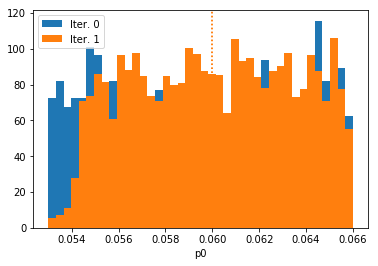

In [3]:
_, ax = plt.subplots()
for t in range(0, h_incorrect.max_t + 1):
    pyabc.visualization.plot_histogram_1d(
        h_incorrect, t=t, x="p0", xmin=xmin, xmax=xmax, ax=ax,
        refval=mv.p_true, label=f"Iter. {t}", bins=40)
plt.legend()

In [4]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=True)
temperature = pyabc.Temperature()
distance = lambda x, x0: np.sum((x['y0']-x0['y0'])**2)
kernel = mv.get_kernel()
kernel.pdf_max=20

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor,
                   eps=temperature, population_size=pop_size, sampler=sampler)
h_reweighted = abc.new("sqlite:///h_reweighted_cr.db", data)
h_reweighted = abc.run(max_nr_populations=10)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-13 13:44:29.980167, end_time=None)>
DEBUG:Acceptor:pdf_norm=2.0000e+01 for t=0.
INFO:ABC:Calibration sample before t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [25.30836175007691].
INFO:ABC:t: 0, eps: 25.30836175007691.
DEBUG:Acceptor:Encountered pd=2.5016e+01 > c=2.0000e+01, thus weight=1.2192e+00.
DEBUG:Acceptor:Encountered pd=2.2239e+01 > c=2.0000e+01, thus weight=1.0925e+00.
DEBUG:Acceptor:Encountered pd=2.1086e+01 > c=2.0000e+01, thus weight=1.0438e+00.
DEBUG:Acceptor:Encountered pd=2.2030e+01 > c=2.0000e+01, thus weight=1.0835e+00.
DEBUG:Acceptor:Encountered pd=2.4892e+01 > c=2.0000e+01, thus weight=1.2133e+00.
DEBUG:Acceptor:Encountered pd=2.5250e+01 > c=2.0000e+01, thus weight=1.2305e+00.
DEBUG:Acceptor:Encountered pd=2.3356e+01 > c=2.0000e+01, thus weight=1.1418e+00.
DEBUG:Acceptor:Encountered pd=2.5230e+01 > c=2.0000e+01, thus weight=1.2296e+00.
DEBUG:Acceptor:Encountered pd=2.5274e+01 > c=2.0000e+01, thus weight=1.2317e+

DEBUG:Acceptor:Encountered pd=2.4731e+01 > c=2.0000e+01, thus weight=1.2055e+00.
DEBUG:Acceptor:Encountered pd=2.5463e+01 > c=2.0000e+01, thus weight=1.2409e+00.
DEBUG:Acceptor:Encountered pd=2.5459e+01 > c=2.0000e+01, thus weight=1.2407e+00.
DEBUG:Acceptor:Encountered pd=2.5253e+01 > c=2.0000e+01, thus weight=1.2307e+00.
DEBUG:Acceptor:Encountered pd=2.1871e+01 > c=2.0000e+01, thus weight=1.0767e+00.
DEBUG:Acceptor:Encountered pd=2.1363e+01 > c=2.0000e+01, thus weight=1.0553e+00.
DEBUG:Acceptor:Encountered pd=2.2276e+01 > c=2.0000e+01, thus weight=1.0941e+00.
DEBUG:Acceptor:Encountered pd=2.4133e+01 > c=2.0000e+01, thus weight=1.1774e+00.
DEBUG:Acceptor:Encountered pd=2.5022e+01 > c=2.0000e+01, thus weight=1.2195e+00.
DEBUG:Acceptor:Encountered pd=2.1994e+01 > c=2.0000e+01, thus weight=1.0820e+00.
DEBUG:Acceptor:Encountered pd=2.3778e+01 > c=2.0000e+01, thus weight=1.1610e+00.
DEBUG:Acceptor:Encountered pd=2.4294e+01 > c=2.0000e+01, thus weight=1.1849e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.3902e+01 > c=2.0000e+01, thus weight=1.1667e+00.
DEBUG:Acceptor:Encountered pd=2.1093e+01 > c=2.0000e+01, thus weight=1.0441e+00.
DEBUG:Acceptor:Encountered pd=2.5485e+01 > c=2.0000e+01, thus weight=1.2420e+00.
DEBUG:Acceptor:Encountered pd=2.5198e+01 > c=2.0000e+01, thus weight=1.2280e+00.
DEBUG:Acceptor:Encountered pd=2.5461e+01 > c=2.0000e+01, thus weight=1.2408e+00.
DEBUG:Acceptor:Encountered pd=2.0795e+01 > c=2.0000e+01, thus weight=1.0319e+00.
DEBUG:Acceptor:Encountered pd=2.4275e+01 > c=2.0000e+01, thus weight=1.1840e+00.
DEBUG:Acceptor:Encountered pd=2.4852e+01 > c=2.0000e+01, thus weight=1.2113e+00.
DEBUG:Acceptor:Encountered pd=2.4288e+01 > c=2.0000e+01, thus weight=1.1846e+00.
DEBUG:Acceptor:Encountered pd=2.4643e+01 > c=2.0000e+01, thus weight=1.2014e+00.
DEBUG:Acceptor:Encountered pd=2.4991e+01 > c=2.0000e+01, thus weight=1.2180e+00.
DEBUG:Acceptor:Encountered pd=2.5070e+01 > c=2.0000e+01, thus weight=1.2218e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4479e+01 > c=2.0000e+01, thus weight=1.1936e+00.
DEBUG:Acceptor:Encountered pd=2.5498e+01 > c=2.0000e+01, thus weight=1.2427e+00.
DEBUG:Acceptor:Encountered pd=2.2553e+01 > c=2.0000e+01, thus weight=1.1061e+00.
DEBUG:Acceptor:Encountered pd=2.3519e+01 > c=2.0000e+01, thus weight=1.1492e+00.
DEBUG:Acceptor:Encountered pd=2.0723e+01 > c=2.0000e+01, thus weight=1.0290e+00.
DEBUG:Acceptor:Encountered pd=2.0039e+01 > c=2.0000e+01, thus weight=1.0015e+00.
DEBUG:Acceptor:Encountered pd=2.3581e+01 > c=2.0000e+01, thus weight=1.1520e+00.
DEBUG:Acceptor:Encountered pd=2.5440e+01 > c=2.0000e+01, thus weight=1.2398e+00.
DEBUG:Acceptor:Encountered pd=2.5465e+01 > c=2.0000e+01, thus weight=1.2410e+00.
DEBUG:Acceptor:Encountered pd=2.5352e+01 > c=2.0000e+01, thus weight=1.2355e+00.
DEBUG:Acceptor:Encountered pd=2.1869e+01 > c=2.0000e+01, thus weight=1.0767e+00.
DEBUG:Acceptor:Encountered pd=2.5136e+01 > c=2.0000e+01, thus weight=1.2250e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2037e+01 > c=2.0000e+01, thus weight=1.0838e+00.
DEBUG:Acceptor:Encountered pd=2.5459e+01 > c=2.0000e+01, thus weight=1.2407e+00.
DEBUG:Acceptor:Encountered pd=2.2461e+01 > c=2.0000e+01, thus weight=1.1021e+00.
DEBUG:Acceptor:Encountered pd=2.5073e+01 > c=2.0000e+01, thus weight=1.2219e+00.
DEBUG:Acceptor:Encountered pd=2.5148e+01 > c=2.0000e+01, thus weight=1.2256e+00.
DEBUG:Acceptor:Encountered pd=2.5427e+01 > c=2.0000e+01, thus weight=1.2392e+00.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=1.2427e+00.
DEBUG:Acceptor:Encountered pd=2.2317e+01 > c=2.0000e+01, thus weight=1.0959e+00.
DEBUG:Acceptor:Encountered pd=2.4423e+01 > c=2.0000e+01, thus weight=1.1910e+00.
DEBUG:Acceptor:Encountered pd=2.2784e+01 > c=2.0000e+01, thus weight=1.1163e+00.
DEBUG:Acceptor:Encountered pd=2.4803e+01 > c=2.0000e+01, thus weight=1.2090e+00.
DEBUG:Acceptor:Encountered pd=2.0212e+01 > c=2.0000e+01, thus weight=1.0084e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4610e+01 > c=2.0000e+01, thus weight=1.1998e+00.
DEBUG:Acceptor:Encountered pd=2.2712e+01 > c=2.0000e+01, thus weight=1.1131e+00.
DEBUG:Acceptor:Encountered pd=2.5429e+01 > c=2.0000e+01, thus weight=1.2392e+00.
DEBUG:Acceptor:Encountered pd=2.4595e+01 > c=2.0000e+01, thus weight=1.1991e+00.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=1.2427e+00.
DEBUG:Acceptor:Encountered pd=2.4199e+01 > c=2.0000e+01, thus weight=1.1805e+00.
DEBUG:Acceptor:Encountered pd=2.5012e+01 > c=2.0000e+01, thus weight=1.2190e+00.
DEBUG:Acceptor:Encountered pd=2.3328e+01 > c=2.0000e+01, thus weight=1.1405e+00.
DEBUG:Acceptor:Encountered pd=2.2403e+01 > c=2.0000e+01, thus weight=1.0996e+00.
DEBUG:Acceptor:Encountered pd=2.2471e+01 > c=2.0000e+01, thus weight=1.1025e+00.
DEBUG:Acceptor:Encountered pd=2.2652e+01 > c=2.0000e+01, thus weight=1.1105e+00.
DEBUG:Acceptor:Encountered pd=2.4681e+01 > c=2.0000e+01, thus weight=1.2032e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4433e+01 > c=2.0000e+01, thus weight=1.1914e+00.
DEBUG:Acceptor:Encountered pd=2.5260e+01 > c=2.0000e+01, thus weight=1.2310e+00.
DEBUG:Acceptor:Encountered pd=2.0505e+01 > c=2.0000e+01, thus weight=1.0202e+00.
DEBUG:Acceptor:Encountered pd=2.2661e+01 > c=2.0000e+01, thus weight=1.1109e+00.
DEBUG:Acceptor:Encountered pd=2.4941e+01 > c=2.0000e+01, thus weight=1.2156e+00.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=1.2427e+00.
DEBUG:Acceptor:Encountered pd=2.4517e+01 > c=2.0000e+01, thus weight=1.1954e+00.
DEBUG:Acceptor:Encountered pd=2.4965e+01 > c=2.0000e+01, thus weight=1.2167e+00.
DEBUG:Acceptor:Encountered pd=2.0629e+01 > c=2.0000e+01, thus weight=1.0252e+00.
DEBUG:Acceptor:Encountered pd=2.5386e+01 > c=2.0000e+01, thus weight=1.2371e+00.
DEBUG:Acceptor:Encountered pd=2.5008e+01 > c=2.0000e+01, thus weight=1.2188e+00.
DEBUG:Acceptor:Encountered pd=2.3692e+01 > c=2.0000e+01, thus weight=1.1571e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.0348e+01 > c=2.0000e+01, thus weight=1.0138e+00.
DEBUG:Acceptor:Encountered pd=2.2413e+01 > c=2.0000e+01, thus weight=1.1000e+00.
DEBUG:Acceptor:Encountered pd=2.2385e+01 > c=2.0000e+01, thus weight=1.0988e+00.
DEBUG:Acceptor:Encountered pd=2.1229e+01 > c=2.0000e+01, thus weight=1.0498e+00.
DEBUG:Acceptor:Encountered pd=2.2403e+01 > c=2.0000e+01, thus weight=1.0996e+00.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=1.2427e+00.
DEBUG:Acceptor:Encountered pd=2.3573e+01 > c=2.0000e+01, thus weight=1.1516e+00.
DEBUG:Acceptor:Encountered pd=2.4604e+01 > c=2.0000e+01, thus weight=1.1995e+00.
DEBUG:Acceptor:Encountered pd=2.5178e+01 > c=2.0000e+01, thus weight=1.2270e+00.
DEBUG:Acceptor:Encountered pd=2.1583e+01 > c=2.0000e+01, thus weight=1.0645e+00.
DEBUG:Acceptor:Encountered pd=2.2303e+01 > c=2.0000e+01, thus weight=1.0952e+00.
DEBUG:Acceptor:Encountered pd=2.2747e+01 > c=2.0000e+01, thus weight=1.1147e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5404e+01 > c=2.0000e+01, thus weight=1.2380e+00.
DEBUG:Acceptor:Encountered pd=2.0126e+01 > c=2.0000e+01, thus weight=1.0050e+00.
DEBUG:Acceptor:Encountered pd=2.5435e+01 > c=2.0000e+01, thus weight=1.2395e+00.
DEBUG:Acceptor:Encountered pd=2.1045e+01 > c=2.0000e+01, thus weight=1.0422e+00.
DEBUG:Acceptor:Encountered pd=2.3234e+01 > c=2.0000e+01, thus weight=1.1363e+00.
DEBUG:Acceptor:Encountered pd=2.2320e+01 > c=2.0000e+01, thus weight=1.0960e+00.
DEBUG:Acceptor:Encountered pd=2.4352e+01 > c=2.0000e+01, thus weight=1.1876e+00.
DEBUG:Acceptor:Encountered pd=2.4773e+01 > c=2.0000e+01, thus weight=1.2076e+00.
DEBUG:Acceptor:Encountered pd=2.5387e+01 > c=2.0000e+01, thus weight=1.2372e+00.
DEBUG:Acceptor:Encountered pd=2.3685e+01 > c=2.0000e+01, thus weight=1.1568e+00.
DEBUG:Acceptor:Encountered pd=2.4249e+01 > c=2.0000e+01, thus weight=1.1828e+00.
DEBUG:Acceptor:Encountered pd=2.0007e+01 > c=2.0000e+01, thus weight=1.0003e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4514e+01 > c=2.0000e+01, thus weight=1.1953e+00.
DEBUG:Acceptor:Encountered pd=2.5314e+01 > c=2.0000e+01, thus weight=1.2336e+00.
DEBUG:Acceptor:Encountered pd=2.0113e+01 > c=2.0000e+01, thus weight=1.0045e+00.
DEBUG:Acceptor:Encountered pd=2.5491e+01 > c=2.0000e+01, thus weight=1.2423e+00.
DEBUG:Acceptor:Encountered pd=2.3845e+01 > c=2.0000e+01, thus weight=1.1641e+00.
DEBUG:Acceptor:Encountered pd=2.4743e+01 > c=2.0000e+01, thus weight=1.2061e+00.
DEBUG:Acceptor:Encountered pd=2.5395e+01 > c=2.0000e+01, thus weight=1.2376e+00.
DEBUG:Acceptor:Encountered pd=2.2238e+01 > c=2.0000e+01, thus weight=1.0925e+00.
DEBUG:Acceptor:Encountered pd=2.0280e+01 > c=2.0000e+01, thus weight=1.0111e+00.
DEBUG:Acceptor:Encountered pd=2.4323e+01 > c=2.0000e+01, thus weight=1.1863e+00.
DEBUG:Acceptor:Encountered pd=2.2694e+01 > c=2.0000e+01, thus weight=1.1123e+00.
DEBUG:Acceptor:Encountered pd=2.0393e+01 > c=2.0000e+01, thus weight=1.0156e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4924e+01 > c=2.0000e+01, thus weight=1.2148e+00.
DEBUG:Acceptor:Encountered pd=2.5490e+01 > c=2.0000e+01, thus weight=1.2422e+00.
DEBUG:Acceptor:Encountered pd=2.0821e+01 > c=2.0000e+01, thus weight=1.0330e+00.
DEBUG:Acceptor:Encountered pd=2.4710e+01 > c=2.0000e+01, thus weight=1.2045e+00.
DEBUG:Acceptor:Encountered pd=2.0298e+01 > c=2.0000e+01, thus weight=1.0119e+00.
DEBUG:Acceptor:Encountered pd=2.4970e+01 > c=2.0000e+01, thus weight=1.2170e+00.
DEBUG:Acceptor:Encountered pd=2.3830e+01 > c=2.0000e+01, thus weight=1.1634e+00.
DEBUG:Acceptor:Encountered pd=2.4572e+01 > c=2.0000e+01, thus weight=1.1980e+00.
DEBUG:Acceptor:Encountered pd=2.5088e+01 > c=2.0000e+01, thus weight=1.2227e+00.
DEBUG:Acceptor:Encountered pd=2.5447e+01 > c=2.0000e+01, thus weight=1.2401e+00.
DEBUG:Acceptor:Encountered pd=2.4326e+01 > c=2.0000e+01, thus weight=1.1864e+00.
DEBUG:Acceptor:Encountered pd=2.5237e+01 > c=2.0000e+01, thus weight=1.2299e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5157e+01 > c=2.0000e+01, thus weight=1.7370e+02.
DEBUG:Acceptor:Encountered pd=2.4131e+01 > c=2.0000e+01, thus weight=6.2252e+01.
DEBUG:Acceptor:Encountered pd=2.3191e+01 > c=2.0000e+01, thus weight=2.4325e+01.
DEBUG:Acceptor:Encountered pd=2.4801e+01 > c=2.0000e+01, thus weight=1.2160e+02.
DEBUG:Acceptor:Encountered pd=2.5472e+01 > c=2.0000e+01, thus weight=2.3797e+02.
DEBUG:Acceptor:Encountered pd=2.5075e+01 > c=2.0000e+01, thus weight=1.5995e+02.
DEBUG:Acceptor:Encountered pd=2.5224e+01 > c=2.0000e+01, thus weight=1.8562e+02.
DEBUG:Acceptor:Encountered pd=2.5452e+01 > c=2.0000e+01, thus weight=2.3315e+02.
DEBUG:Acceptor:Encountered pd=2.5379e+01 > c=2.0000e+01, thus weight=2.1684e+02.
DEBUG:Acceptor:Encountered pd=2.1463e+01 > c=2.0000e+01, thus weight=4.3203e+00.
DEBUG:Acceptor:Encountered pd=2.5058e+01 > c=2.0000e+01, thus weight=1.5730e+02.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.0000e+01, thus weight=2.4457e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4885e+01 > c=2.0000e+01, thus weight=1.3226e+02.
DEBUG:Acceptor:Encountered pd=2.5406e+01 > c=2.0000e+01, thus weight=2.2270e+02.
DEBUG:Acceptor:Encountered pd=2.4911e+01 > c=2.0000e+01, thus weight=1.3584e+02.
DEBUG:Acceptor:Encountered pd=2.2037e+01 > c=2.0000e+01, thus weight=7.6714e+00.
DEBUG:Acceptor:Encountered pd=2.5430e+01 > c=2.0000e+01, thus weight=2.2804e+02.
DEBUG:Acceptor:Encountered pd=2.5481e+01 > c=2.0000e+01, thus weight=2.4012e+02.
DEBUG:Acceptor:Encountered pd=2.4342e+01 > c=2.0000e+01, thus weight=7.6825e+01.
DEBUG:Acceptor:Encountered pd=2.4429e+01 > c=2.0000e+01, thus weight=8.3858e+01.
DEBUG:Acceptor:Encountered pd=2.2804e+01 > c=2.0000e+01, thus weight=1.6505e+01.
DEBUG:Acceptor:Encountered pd=2.3302e+01 > c=2.0000e+01, thus weight=2.7156e+01.
DEBUG:Acceptor:Encountered pd=2.5339e+01 > c=2.0000e+01, thus weight=2.0835e+02.
DEBUG:Acceptor:Encountered pd=2.5316e+01 > c=2.0000e+01, thus weight=2.0366e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5485e+01 > c=2.0000e+01, thus weight=2.4097e+02.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=2.4442e+02.
DEBUG:Acceptor:Encountered pd=2.1311e+01 > c=2.0000e+01, thus weight=3.7085e+00.
DEBUG:Acceptor:Encountered pd=2.2725e+01 > c=2.0000e+01, thus weight=1.5258e+01.
DEBUG:Acceptor:Encountered pd=2.0896e+01 > c=2.0000e+01, thus weight=2.4500e+00.
DEBUG:Acceptor:Encountered pd=2.0616e+01 > c=2.0000e+01, thus weight=1.8516e+00.
DEBUG:Acceptor:Encountered pd=2.1740e+01 > c=2.0000e+01, thus weight=5.6951e+00.
DEBUG:Acceptor:Encountered pd=2.4995e+01 > c=2.0000e+01, thus weight=1.4774e+02.
DEBUG:Acceptor:Encountered pd=2.0160e+01 > c=2.0000e+01, thus weight=1.1739e+00.
DEBUG:Acceptor:Encountered pd=2.5329e+01 > c=2.0000e+01, thus weight=2.0630e+02.
DEBUG:Acceptor:Encountered pd=2.2714e+01 > c=2.0000e+01, thus weight=1.5091e+01.
DEBUG:Acceptor:Encountered pd=2.5483e+01 > c=2.0000e+01, thus weight=2.4055e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4274e+01 > c=2.0000e+01, thus weight=7.1780e+01.
DEBUG:Acceptor:Encountered pd=2.4710e+01 > c=2.0000e+01, thus weight=1.1107e+02.
DEBUG:Acceptor:Encountered pd=2.3499e+01 > c=2.0000e+01, thus weight=3.3075e+01.
DEBUG:Acceptor:Encountered pd=2.5003e+01 > c=2.0000e+01, thus weight=1.4880e+02.
DEBUG:Acceptor:Encountered pd=2.3499e+01 > c=2.0000e+01, thus weight=3.3093e+01.
DEBUG:Acceptor:Encountered pd=2.5489e+01 > c=2.0000e+01, thus weight=2.4200e+02.
DEBUG:Acceptor:Encountered pd=2.5278e+01 > c=2.0000e+01, thus weight=1.9594e+02.
DEBUG:Acceptor:Encountered pd=2.5325e+01 > c=2.0000e+01, thus weight=2.0533e+02.
DEBUG:Acceptor:Encountered pd=2.4314e+01 > c=2.0000e+01, thus weight=7.4730e+01.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=2.4446e+02.
DEBUG:Acceptor:Encountered pd=2.0490e+01 > c=2.0000e+01, thus weight=1.6330e+00.
DEBUG:Acceptor:Encountered pd=2.0695e+01 > c=2.0000e+01, thus weight=2.0028e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2616e+01 > c=2.0000e+01, thus weight=1.3685e+01.
DEBUG:Acceptor:Encountered pd=2.5496e+01 > c=2.0000e+01, thus weight=2.4364e+02.
DEBUG:Acceptor:Encountered pd=2.0127e+01 > c=2.0000e+01, thus weight=1.1358e+00.
DEBUG:Acceptor:Encountered pd=2.2352e+01 > c=2.0000e+01, thus weight=1.0510e+01.
DEBUG:Acceptor:Encountered pd=2.3794e+01 > c=2.0000e+01, thus weight=4.4430e+01.
DEBUG:Acceptor:Encountered pd=2.3984e+01 > c=2.0000e+01, thus weight=5.3758e+01.
DEBUG:Acceptor:Encountered pd=2.0793e+01 > c=2.0000e+01, thus weight=2.2090e+00.
DEBUG:Acceptor:Encountered pd=2.4123e+01 > c=2.0000e+01, thus weight=6.1755e+01.
DEBUG:Acceptor:Encountered pd=2.5158e+01 > c=2.0000e+01, thus weight=1.7373e+02.
DEBUG:Acceptor:Encountered pd=2.4881e+01 > c=2.0000e+01, thus weight=1.3172e+02.
DEBUG:Acceptor:Encountered pd=2.5435e+01 > c=2.0000e+01, thus weight=2.2936e+02.
DEBUG:Acceptor:Encountered pd=2.5495e+01 > c=2.0000e+01, thus weight=2.4350e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5416e+01 > c=2.0000e+01, thus weight=2.2489e+02.
DEBUG:Acceptor:Encountered pd=2.1006e+01 > c=2.0000e+01, thus weight=2.7343e+00.
DEBUG:Acceptor:Encountered pd=2.3362e+01 > c=2.0000e+01, thus weight=2.8837e+01.
DEBUG:Acceptor:Encountered pd=2.4418e+01 > c=2.0000e+01, thus weight=8.2958e+01.
DEBUG:Acceptor:Encountered pd=2.5445e+01 > c=2.0000e+01, thus weight=2.3157e+02.
DEBUG:Acceptor:Encountered pd=2.0784e+01 > c=2.0000e+01, thus weight=2.1895e+00.
DEBUG:Acceptor:Encountered pd=2.1801e+01 > c=2.0000e+01, thus weight=6.0575e+00.
DEBUG:Acceptor:Encountered pd=2.0392e+01 > c=2.0000e+01, thus weight=1.4795e+00.
DEBUG:Acceptor:Encountered pd=2.5183e+01 > c=2.0000e+01, thus weight=1.7829e+02.
DEBUG:Acceptor:Encountered pd=2.2007e+01 > c=2.0000e+01, thus weight=7.4431e+00.
DEBUG:Acceptor:Encountered pd=2.5272e+01 > c=2.0000e+01, thus weight=1.9478e+02.
DEBUG:Acceptor:Encountered pd=2.5431e+01 > c=2.0000e+01, thus weight=2.2831e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5041e+01 > c=2.0000e+01, thus weight=1.5455e+02.
DEBUG:Acceptor:Encountered pd=2.5476e+01 > c=2.0000e+01, thus weight=2.3895e+02.
DEBUG:Acceptor:Encountered pd=2.5425e+01 > c=2.0000e+01, thus weight=2.2712e+02.
DEBUG:Acceptor:Encountered pd=2.3385e+01 > c=2.0000e+01, thus weight=2.9522e+01.
DEBUG:Acceptor:Encountered pd=2.3938e+01 > c=2.0000e+01, thus weight=5.1314e+01.
DEBUG:Acceptor:Encountered pd=2.5348e+01 > c=2.0000e+01, thus weight=2.1019e+02.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.0000e+01, thus weight=2.4462e+02.
DEBUG:Acceptor:Encountered pd=2.3064e+01 > c=2.0000e+01, thus weight=2.1417e+01.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=2.4455e+02.
DEBUG:Acceptor:Encountered pd=2.2125e+01 > c=2.0000e+01, thus weight=8.3716e+00.
DEBUG:Acceptor:Encountered pd=2.4155e+01 > c=2.0000e+01, thus weight=6.3735e+01.
DEBUG:Acceptor:Encountered pd=2.4326e+01 > c=2.0000e+01, thus weight=7.5654e+01.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2844e+01 > c=2.0000e+01, thus weight=1.7177e+01.
DEBUG:Acceptor:Encountered pd=2.4426e+01 > c=2.0000e+01, thus weight=8.3594e+01.
DEBUG:Acceptor:Encountered pd=2.5358e+01 > c=2.0000e+01, thus weight=2.1235e+02.
DEBUG:Acceptor:Encountered pd=2.3423e+01 > c=2.0000e+01, thus weight=3.0675e+01.
DEBUG:Acceptor:Encountered pd=2.2391e+01 > c=2.0000e+01, thus weight=1.0923e+01.
DEBUG:Acceptor:Encountered pd=2.5333e+01 > c=2.0000e+01, thus weight=2.0709e+02.
DEBUG:Acceptor:Encountered pd=2.5146e+01 > c=2.0000e+01, thus weight=1.7171e+02.
DEBUG:Acceptor:Encountered pd=2.5389e+01 > c=2.0000e+01, thus weight=2.1896e+02.
DEBUG:Acceptor:Encountered pd=2.3523e+01 > c=2.0000e+01, thus weight=3.3872e+01.
DEBUG:Acceptor:Encountered pd=2.1742e+01 > c=2.0000e+01, thus weight=5.7067e+00.
DEBUG:Acceptor:Encountered pd=2.5488e+01 > c=2.0000e+01, thus weight=2.4187e+02.
DEBUG:Acceptor:Encountered pd=2.1451e+01 > c=2.0000e+01, thus weight=4.2662e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2132e+01 > c=2.0000e+01, thus weight=8.4354e+00.
DEBUG:Acceptor:Encountered pd=2.1920e+01 > c=2.0000e+01, thus weight=6.8193e+00.
DEBUG:Acceptor:Encountered pd=2.5499e+01 > c=2.0000e+01, thus weight=2.4439e+02.
DEBUG:Acceptor:Encountered pd=2.5448e+01 > c=2.0000e+01, thus weight=2.3224e+02.
DEBUG:Acceptor:Encountered pd=2.5362e+01 > c=2.0000e+01, thus weight=2.1324e+02.
DEBUG:Acceptor:Encountered pd=2.4377e+01 > c=2.0000e+01, thus weight=7.9631e+01.
DEBUG:Acceptor:Encountered pd=2.3694e+01 > c=2.0000e+01, thus weight=4.0199e+01.
DEBUG:Acceptor:Encountered pd=2.2926e+01 > c=2.0000e+01, thus weight=1.8652e+01.
DEBUG:Acceptor:Encountered pd=2.5235e+01 > c=2.0000e+01, thus weight=1.8777e+02.
DEBUG:Acceptor:Encountered pd=2.3961e+01 > c=2.0000e+01, thus weight=5.2520e+01.
DEBUG:Acceptor:Encountered pd=2.5158e+01 > c=2.0000e+01, thus weight=1.7383e+02.
DEBUG:Acceptor:Encountered pd=2.2272e+01 > c=2.0000e+01, thus weight=9.7020e+00.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5488e+01 > c=2.0000e+01, thus weight=2.4176e+02.
DEBUG:Acceptor:Encountered pd=2.4216e+01 > c=2.0000e+01, thus weight=6.7746e+01.
DEBUG:Acceptor:Encountered pd=2.0128e+01 > c=2.0000e+01, thus weight=1.1364e+00.
DEBUG:Acceptor:Encountered pd=2.3215e+01 > c=2.0000e+01, thus weight=2.4894e+01.
DEBUG:Acceptor:Encountered pd=2.4804e+01 > c=2.0000e+01, thus weight=1.2194e+02.
DEBUG:Acceptor:Encountered pd=2.5234e+01 > c=2.0000e+01, thus weight=1.8754e+02.
DEBUG:Acceptor:Encountered pd=2.0141e+01 > c=2.0000e+01, thus weight=1.1509e+00.
DEBUG:Acceptor:Encountered pd=2.0942e+01 > c=2.0000e+01, thus weight=2.5651e+00.
DEBUG:Acceptor:Encountered pd=2.5202e+01 > c=2.0000e+01, thus weight=1.8172e+02.
DEBUG:Acceptor:Encountered pd=2.5498e+01 > c=2.0000e+01, thus weight=2.4429e+02.
DEBUG:Acceptor:Encountered pd=2.2425e+01 > c=2.0000e+01, thus weight=1.1307e+01.
DEBUG:Acceptor:Encountered pd=2.2680e+01 > c=2.0000e+01, thus weight=1.4590e+01.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.3659e+01 > c=2.0000e+01, thus weight=3.8817e+01.
DEBUG:Acceptor:Encountered pd=2.3224e+01 > c=2.0000e+01, thus weight=2.5122e+01.
DEBUG:Acceptor:Encountered pd=2.5369e+01 > c=2.0000e+01, thus weight=2.1467e+02.
DEBUG:Acceptor:Encountered pd=2.4385e+01 > c=2.0000e+01, thus weight=8.0228e+01.
DEBUG:Acceptor:Encountered pd=2.5186e+01 > c=2.0000e+01, thus weight=1.7873e+02.
DEBUG:Acceptor:Encountered pd=2.5047e+01 > c=2.0000e+01, thus weight=1.5563e+02.
DEBUG:Acceptor:Encountered pd=2.1367e+01 > c=2.0000e+01, thus weight=3.9236e+00.
DEBUG:Acceptor:Encountered pd=2.5498e+01 > c=2.0000e+01, thus weight=2.4408e+02.
DEBUG:Acceptor:Encountered pd=2.2626e+01 > c=2.0000e+01, thus weight=1.3821e+01.
DEBUG:Acceptor:Encountered pd=2.4020e+01 > c=2.0000e+01, thus weight=5.5724e+01.
DEBUG:Acceptor:Encountered pd=2.5308e+01 > c=2.0000e+01, thus weight=2.0188e+02.
DEBUG:Acceptor:Encountered pd=2.5347e+01 > c=2.0000e+01, thus weight=2.1003e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.4222e+01 > c=2.0000e+01, thus weight=6.8181e+01.
DEBUG:Acceptor:Encountered pd=2.1962e+01 > c=2.0000e+01, thus weight=7.1139e+00.
DEBUG:Acceptor:Encountered pd=2.1466e+01 > c=2.0000e+01, thus weight=4.3305e+00.
DEBUG:Acceptor:Encountered pd=2.3927e+01 > c=2.0000e+01, thus weight=5.0775e+01.
DEBUG:Acceptor:Encountered pd=2.4209e+01 > c=2.0000e+01, thus weight=6.7276e+01.
DEBUG:Acceptor:Encountered pd=2.3700e+01 > c=2.0000e+01, thus weight=4.0447e+01.
DEBUG:Acceptor:Encountered pd=2.1763e+01 > c=2.0000e+01, thus weight=5.8279e+00.
DEBUG:Acceptor:Encountered pd=2.3558e+01 > c=2.0000e+01, thus weight=3.5091e+01.
DEBUG:Acceptor:Encountered pd=2.5490e+01 > c=2.0000e+01, thus weight=2.4217e+02.
DEBUG:Acceptor:Encountered pd=2.5497e+01 > c=2.0000e+01, thus weight=2.4407e+02.
DEBUG:Acceptor:Encountered pd=2.5027e+01 > c=2.0000e+01, thus weight=1.5254e+02.
DEBUG:Acceptor:Encountered pd=2.3836e+01 > c=2.0000e+01, thus weight=4.6321e+01.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.0463e+01 > c=2.0000e+01, thus weight=1.5886e+00.
DEBUG:Acceptor:Encountered pd=2.4627e+01 > c=2.0000e+01, thus weight=1.0220e+02.
DEBUG:Acceptor:Encountered pd=2.2506e+01 > c=2.0000e+01, thus weight=1.2253e+01.
DEBUG:Acceptor:Encountered pd=2.5171e+01 > c=2.0000e+01, thus weight=1.7611e+02.
DEBUG:Acceptor:Encountered pd=2.0050e+01 > c=2.0000e+01, thus weight=1.0508e+00.
DEBUG:Acceptor:Encountered pd=2.0353e+01 > c=2.0000e+01, thus weight=1.4237e+00.
DEBUG:Acceptor:Encountered pd=2.5359e+01 > c=2.0000e+01, thus weight=2.1259e+02.
DEBUG:Acceptor:Encountered pd=2.3657e+01 > c=2.0000e+01, thus weight=3.8735e+01.
DEBUG:Acceptor:Encountered pd=2.3680e+01 > c=2.0000e+01, thus weight=3.9635e+01.
DEBUG:Acceptor:Encountered pd=2.0612e+01 > c=2.0000e+01, thus weight=1.8447e+00.
DEBUG:Acceptor:Encountered pd=2.2335e+01 > c=2.0000e+01, thus weight=1.0330e+01.
DEBUG:Acceptor:Encountered pd=2.5152e+01 > c=2.0000e+01, thus weight=1.7283e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.2979e+01 > c=2.0000e+01, thus weight=1.9674e+01.
DEBUG:Acceptor:Encountered pd=2.2607e+01 > c=2.0000e+01, thus weight=1.3565e+01.
DEBUG:Acceptor:Encountered pd=2.4098e+01 > c=2.0000e+01, thus weight=6.0196e+01.
DEBUG:Acceptor:Encountered pd=2.2904e+01 > c=2.0000e+01, thus weight=1.8256e+01.
DEBUG:Acceptor:Encountered pd=2.3655e+01 > c=2.0000e+01, thus weight=3.8674e+01.
DEBUG:Acceptor:Encountered pd=2.1886e+01 > c=2.0000e+01, thus weight=6.5942e+00.
DEBUG:Acceptor:Encountered pd=2.2569e+01 > c=2.0000e+01, thus weight=1.3058e+01.
DEBUG:Acceptor:Encountered pd=2.3945e+01 > c=2.0000e+01, thus weight=5.1673e+01.
DEBUG:Acceptor:Encountered pd=2.2508e+01 > c=2.0000e+01, thus weight=1.2284e+01.
DEBUG:Acceptor:Encountered pd=2.5382e+01 > c=2.0000e+01, thus weight=2.1736e+02.
DEBUG:Acceptor:Encountered pd=2.1686e+01 > c=2.0000e+01, thus weight=5.3980e+00.
DEBUG:Acceptor:Encountered pd=2.4197e+01 > c=2.0000e+01, thus weight=6.6465e+01.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.3436e+01 > c=2.0000e+01, thus weight=3.1057e+01.
DEBUG:Acceptor:Encountered pd=2.3580e+01 > c=2.0000e+01, thus weight=3.5869e+01.
DEBUG:Acceptor:Encountered pd=2.1580e+01 > c=2.0000e+01, thus weight=4.8565e+00.
DEBUG:Acceptor:Encountered pd=2.4746e+01 > c=2.0000e+01, thus weight=1.1509e+02.
DEBUG:Acceptor:Encountered pd=2.5069e+01 > c=2.0000e+01, thus weight=1.5905e+02.
DEBUG:Acceptor:Encountered pd=2.4122e+01 > c=2.0000e+01, thus weight=6.1699e+01.
DEBUG:Acceptor:Encountered pd=2.5382e+01 > c=2.0000e+01, thus weight=2.1739e+02.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.0000e+01, thus weight=2.4469e+02.
DEBUG:Acceptor:Encountered pd=2.4018e+01 > c=2.0000e+01, thus weight=5.5575e+01.
DEBUG:Acceptor:Encountered pd=2.1815e+01 > c=2.0000e+01, thus weight=6.1412e+00.
DEBUG:Acceptor:Encountered pd=2.5065e+01 > c=2.0000e+01, thus weight=1.5843e+02.
DEBUG:Acceptor:Encountered pd=2.5380e+01 > c=2.0000e+01, thus weight=2.1704e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.3771e+01 > c=2.0000e+01, thus weight=4.3419e+01.
DEBUG:Acceptor:Encountered pd=2.5293e+01 > c=2.0000e+01, thus weight=1.9896e+02.
DEBUG:Acceptor:Encountered pd=2.4223e+01 > c=2.0000e+01, thus weight=6.8269e+01.
DEBUG:Acceptor:Encountered pd=2.1449e+01 > c=2.0000e+01, thus weight=4.2580e+00.
DEBUG:Acceptor:Encountered pd=2.0136e+01 > c=2.0000e+01, thus weight=1.1455e+00.
DEBUG:Acceptor:Encountered pd=2.2670e+01 > c=2.0000e+01, thus weight=1.4447e+01.
DEBUG:Acceptor:Encountered pd=2.5454e+01 > c=2.0000e+01, thus weight=2.3360e+02.
DEBUG:Acceptor:Encountered pd=2.0911e+01 > c=2.0000e+01, thus weight=2.4877e+00.
DEBUG:Acceptor:Encountered pd=2.4686e+01 > c=2.0000e+01, thus weight=1.0840e+02.
DEBUG:Acceptor:Encountered pd=2.5500e+01 > c=2.0000e+01, thus weight=2.4472e+02.
DEBUG:Acceptor:Encountered pd=2.5357e+01 > c=2.0000e+01, thus weight=2.1216e+02.
DEBUG:Acceptor:Encountered pd=2.4275e+01 > c=2.0000e+01, thus weight=7.1885e+01.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.0708e+01 > c=2.0000e+01, thus weight=2.0291e+00.
DEBUG:Acceptor:Encountered pd=2.2554e+01 > c=2.0000e+01, thus weight=1.2857e+01.
DEBUG:Acceptor:Encountered pd=2.2195e+01 > c=2.0000e+01, thus weight=8.9819e+00.
DEBUG:Acceptor:Encountered pd=2.2204e+01 > c=2.0000e+01, thus weight=9.0586e+00.
DEBUG:Acceptor:Encountered pd=2.5118e+01 > c=2.0000e+01, thus weight=1.6703e+02.
DEBUG:Acceptor:Encountered pd=2.5099e+01 > c=2.0000e+01, thus weight=1.6380e+02.
DEBUG:Acceptor:Encountered pd=2.1867e+01 > c=2.0000e+01, thus weight=6.4711e+00.
DEBUG:Acceptor:Encountered pd=2.1824e+01 > c=2.0000e+01, thus weight=6.1963e+00.
DEBUG:Acceptor:Encountered pd=2.5441e+01 > c=2.0000e+01, thus weight=2.3064e+02.
DEBUG:Acceptor:Encountered pd=2.4035e+01 > c=2.0000e+01, thus weight=5.6556e+01.
DEBUG:Acceptor:Encountered pd=2.5347e+01 > c=2.0000e+01, thus weight=2.1005e+02.
DEBUG:Acceptor:Encountered pd=2.5210e+01 > c=2.0000e+01, thus weight=1.8312e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5469e+01 > c=2.0000e+01, thus weight=2.3729e+02.
DEBUG:Acceptor:Encountered pd=2.5251e+01 > c=2.0000e+01, thus weight=1.9084e+02.
DEBUG:Acceptor:Encountered pd=2.3477e+01 > c=2.0000e+01, thus weight=3.2368e+01.
DEBUG:Acceptor:Encountered pd=2.2825e+01 > c=2.0000e+01, thus weight=1.6865e+01.
DEBUG:Acceptor:Encountered pd=2.5118e+01 > c=2.0000e+01, thus weight=1.6701e+02.
DEBUG:Acceptor:Encountered pd=2.4286e+01 > c=2.0000e+01, thus weight=7.2648e+01.
DEBUG:Acceptor:Encountered pd=2.2249e+01 > c=2.0000e+01, thus weight=9.4765e+00.
DEBUG:Acceptor:Encountered pd=2.2500e+01 > c=2.0000e+01, thus weight=1.2178e+01.
DEBUG:Acceptor:Encountered pd=2.3771e+01 > c=2.0000e+01, thus weight=4.3419e+01.
DEBUG:Acceptor:Encountered pd=2.1261e+01 > c=2.0000e+01, thus weight=3.5291e+00.
DEBUG:Acceptor:Encountered pd=2.5332e+01 > c=2.0000e+01, thus weight=2.0693e+02.
DEBUG:Acceptor:Encountered pd=2.5024e+01 > c=2.0000e+01, thus weight=1.5199e+02.
DEBUG:Acceptor:Encountered p

DEBUG:Acceptor:Encountered pd=2.5327e+01 > c=2.0000e+01, thus weight=2.0581e+02.
DEBUG:Acceptor:Encountered pd=2.1064e+01 > c=2.0000e+01, thus weight=2.8971e+00.
DEBUG:Acceptor:Encountered pd=2.4047e+01 > c=2.0000e+01, thus weight=5.7240e+01.
DEBUG:Acceptor:Encountered pd=2.3937e+01 > c=2.0000e+01, thus weight=5.1285e+01.
DEBUG:Acceptor:Encountered pd=2.3739e+01 > c=2.0000e+01, thus weight=4.2075e+01.
DEBUG:Acceptor:Encountered pd=2.5463e+01 > c=2.0000e+01, thus weight=2.3580e+02.
DEBUG:Acceptor:Encountered pd=2.4726e+01 > c=2.0000e+01, thus weight=1.1287e+02.
DEBUG:Acceptor:Encountered pd=2.2299e+01 > c=2.0000e+01, thus weight=9.9633e+00.
DEBUG:Acceptor:Encountered pd=2.5074e+01 > c=2.0000e+01, thus weight=1.5975e+02.
DEBUG:Acceptor:Encountered pd=2.3875e+01 > c=2.0000e+01, thus weight=4.8169e+01.
DEBUG:Acceptor:Encountered pd=2.4837e+01 > c=2.0000e+01, thus weight=1.2604e+02.
DEBUG:Acceptor:Encountered pd=2.2228e+01 > c=2.0000e+01, thus weight=9.2792e+00.
DEBUG:Acceptor:Encountered p

In [5]:
_, ax = plt.subplots()
for t in range(0, h_reweighted.max_t + 1):
    pyabc.visualization.plot_histogram_1d(
        h_reweighted, t=t, x="p0", xmin=xmin, xmax=xmax, ax=ax,
        refval=mv.p_true, label=f"Iter. {t}", bins=40)
plt.legend()

In [6]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=False)
temperature = pyabc.Temperature()
kernel = mv.get_kernel()
kernel.pdf_max=23

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor,
                   eps=temperature, population_size=pop_size, sampler=sampler)
h_incorrect2 = abc.new("sqlite:///h_incorrect2_cr.db", data)
h_incorrect2 = abc.run(max_nr_populations=10)

In [ ]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                    apply_importance_weighting=False)
temperature = pyabc.Temperature()
kernel = mv.get_kernel()
kernel.pdf_max=25

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor,
                   eps=temperature, population_size=pop_size, sampler=sampler)
h_incorrect3 = abc.new("sqlite:///h_incorrect3_cr.db", data)
h_incorrect3 = abc.run(max_nr_populations=10)

In [9]:
# this allows to find the optimal c value

acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature()
distance = lambda x, x0: np.sum((x['y0']-x0['y0'])**2)
kernel = mv.get_kernel()

abc = pyabc.ABCSMC(model, prior, kernel, acceptor=acceptor,
                   eps=temperature, population_size=pop_size, sampler=sampler)
h_default = abc.new("sqlite:///h_default_cr.db", data)
h_default = abc.run(max_nr_populations=10)

INFO:History:Start <ABCSMC(id=1, start_time=2020-01-13 17:07:55.300804, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=2.5500e+01 for t=0.
DEBUG:Epsilon:Proposed temperatures for 0: [36.05766279561873].
INFO:ABC:t: 0, eps: 36.05766279561873.
INFO:ABC:Acceptance rate: 2000 / 6722 = 2.9753e-01, ESS=2.0000e+03.
DEBUG:Acceptor:pdf_norm=2.5500e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures for 1: [2.2085645689034483, 24.210170203050033].
INFO:ABC:t: 1, eps: 2.2085645689034483.
INFO:ABC:Acceptance rate: 2000 / 6536 = 3.0600e-01, ESS=1.9895e+03.
DEBUG:Acceptor:pdf_norm=2.5500e+01 for t=2.
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:ABC:Transition density is zero!
INFO:A

## Plots

In [2]:
posterior_scaled = get_posterior_scaled_1d(mv, data)
p0s = np.linspace(xmin, xmax, 200)
vals = [posterior_scaled([x]) for x in p0s]

Normalization: 7419944304.201206


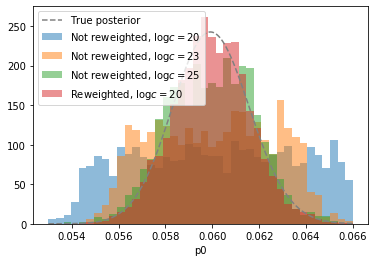

In [3]:
h_reweighted = pyabc.History("sqlite:///h_reweighted_cr.db")
h_incorrect = pyabc.History("sqlite:///h_incorrect_cr.db")
h_incorrect2 = pyabc.History("sqlite:///h_incorrect2_cr.db")
h_incorrect3 = pyabc.History("sqlite:///h_incorrect3_cr.db")
h_default = pyabc.History("sqlite:///h_default_cr.db")

fig, ax = plt.subplots()
pyabc.visualization.plot_histogram_1d(h_incorrect, t=h_incorrect.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, bins=40, alpha=0.5, label="Not reweighted, $\log c=20$")
pyabc.visualization.plot_histogram_1d(h_incorrect2, t=h_incorrect2.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, bins=40, alpha=0.5, label="Not reweighted, $\log c=23$")
pyabc.visualization.plot_histogram_1d(h_incorrect3, t=h_incorrect3.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, bins=40, alpha=0.5, label="Not reweighted, $\log c=25$")
pyabc.visualization.plot_histogram_1d(h_reweighted, t=h_reweighted.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, bins=40, alpha=0.5, label="Reweighted, $\log c=20$")
plt.plot(p0s, vals, '--', label="True posterior", color='grey')
plt.legend()

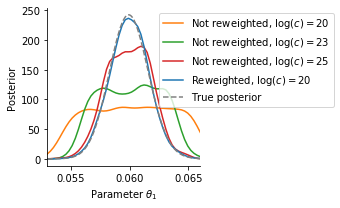

In [57]:
h_reweighted = pyabc.History("sqlite:///h_reweighted_cr.db")
h_incorrect = pyabc.History("sqlite:///h_incorrect_cr.db")
h_incorrect2 = pyabc.History("sqlite:///h_incorrect2_cr.db")
h_incorrect3 = pyabc.History("sqlite:///h_incorrect3_cr.db")
h_default = pyabc.History("sqlite:///h_default_cr.db")

xmin = mv.limits['p0'][0]
xmax = mv.limits['p0'][1]

fig, ax = plt.subplots()
pyabc.visualization.plot_kde_1d_highlevel(h_incorrect, t=h_incorrect.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, label="Not reweighted, $\log(c) = 20$", color='C1')
pyabc.visualization.plot_kde_1d_highlevel(h_incorrect2, t=h_incorrect2.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, label="Not reweighted, $\log(c) = 23$", color='C2')
pyabc.visualization.plot_kde_1d_highlevel(h_incorrect3, t=h_incorrect3.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, label="Not reweighted, $\log(c) = 25$", color='C3')
pyabc.visualization.plot_kde_1d_highlevel(h_reweighted, t=h_reweighted.max_t, x="p0", xmin=xmin, xmax=xmax, ax=ax, label="Reweighted, $\log(c) =20$", color='C0')
#pyabc.visualization.plot_kde_1d_highlevel(h_default, x="p0", xmin=xmin, xmax=xmax, ax=ax, label="Reweighted, adaptive $c$")
ax.plot(p0s, vals, '--', label="True posterior", color='grey')
ax.set_xlabel("Parameter $\\theta_1$")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_size_inches(((3, 3)))
fig.tight_layout()
ax.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
for fmt in ['svg', 'eps']:
    plt.savefig(f"fixed_c_cr.{fmt}", format=fmt)

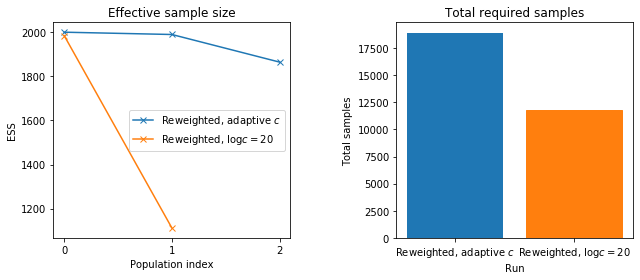

In [34]:
fig, arr_ax = plt.subplots(1,2)

hs = [h_default, h_reweighted]
labels = ["Reweighted, adaptive $c$", "Reweighted, $\log c = 20$"]
pyabc.visualization.plot_effective_sample_sizes(hs, labels, ax=arr_ax[0])
pyabc.visualization.plot_total_sample_numbers(hs, labels, ax=arr_ax[1])
arr_ax[1].get_children()[1].set_color('C1')
#help(arr_ax[1])
fig.set_size_inches((10, 4))
#fig.tight_layout()

for fmt in ['svg', 'eps']:
    plt.savefig("fixed_c_cr_meta.{fmt}", format=fmt)

## Optimization to find optimal distance

In [14]:
# optimize

from study_abc_noise.optimize import multistart_on_kernel

# optimize
result = multistart_on_kernel(mv, data)

# l2
optimal_parameter = result.optimize_result.get_for_key('x')[0]
optimal_value = result.optimize_result.get_for_key('fval')[0]
print("optimal parameter l2: ", optimal_parameter)
print("optimal value l2: ", optimal_value)

INFO:pypesto.engine.task:Executing task 0.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0066s, n_fval=12.
INFO:pypesto.engine.task:Executing task 1.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0065s, n_fval=10.
INFO:pypesto.engine.task:Executing task 2.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0079s, n_fval=12.
INFO:pypesto.engine.task:Executing task 3.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0099s, n_fval=10.
INFO:pypesto.engine.task:Executing task 4.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0069s, n_fval=10.
INFO:pypesto.engine.task:Executing task 5.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0095s, n_fval=10.
INFO:pypesto.engine.task:Executing task 6.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0113s, n_fval=12.
INFO:pypesto.engine.task:Executing task 7.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0075s, n_fval=10.
INFO:pypesto.engine.task:Executi

INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0158s, n_fval=10.
INFO:pypesto.engine.task:Executing task 68.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0223s, n_fval=10.
INFO:pypesto.engine.task:Executing task 69.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0165s, n_fval=10.
INFO:pypesto.engine.task:Executing task 70.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0466s, n_fval=76.
INFO:pypesto.engine.task:Executing task 71.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0197s, n_fval=28.
INFO:pypesto.engine.task:Executing task 72.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0200s, n_fval=26.
INFO:pypesto.engine.task:Executing task 73.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0090s, n_fval=12.
INFO:pypesto.engine.task:Executing task 74.
INFO:pypesto.optimize.optimizer:Final fval=-25.5002, time=0.0107s, n_fval=14.
INFO:pypesto.engine.task:Executing task 75.
INFO:pypesto.optimize.op

optimal parameter l2:  [0.05992043]
optimal value l2:  -25.500215462654133
